In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Kuantizasyon matris değerleri sol üst değerler düşük frekanslı değerler seçilirki sıkıştırma işleminde buralara dokunulmaz
HIGH_COMPRESSION_MATRIX = np.array([
    [32, 22, 20, 32, 48, 80, 102, 122],
    [24, 24, 28, 38, 52, 116, 120, 110],
    [28, 26, 32, 48, 80, 114, 138, 112],
    [28, 34, 44, 58, 102, 174, 160, 124],
    [36, 44, 74, 112, 136, 218, 206, 154],
    [48, 70, 110, 128, 162, 208, 226, 184],
    [98, 128, 156, 174, 206, 242, 240, 202],
    [144, 184, 190, 196, 224, 200, 206, 198]
])

In [9]:

img = cv2.imread("Downloads/rain-pots-jpeg-1.jpg", cv2.IMREAD_GRAYSCALE)  # JPEG sıkıştırmayı göstermek için gri tonlama kullanıyoruz


In [10]:
h, w = img.shape
h = h - (h % 8)  # 8'in katı yapılır
w = w - (w % 8)  # 8'in katı yapılır
img = img[:h, :w]  


In [11]:
#  Ayrık Kosinüs Dönüşümü (DCT) ve Kuantizasyon Uygulaması yapıyoruz
def apply_dct_quantization(block, quant_matrix):
    dct_block = cv2.dct(np.float32(block) - 128)  # DCT piksel değerleri 0 a çekmek için 128 çıkarılır ve piksel uzayından frekans uzayına geçilir
    quantized_block = np.round(dct_block / quant_matrix)  # Kuantizasyon işlemi dct ile kuantizasyon matrisine bölerek daha az önemli frekasn biligleri 0'a yaklaştırılır
    return quantized_block

In [12]:

compressed_img = np.zeros_like(img, dtype=np.float32) #sıkıştırlmış resmi boş bir matrise atarız

In [13]:
# Görüntünün DCT ile sıkıştırılması
for i in range(0, h, 8):
    for j in range(0, w, 8):     
        block = img[i:i+8, j:j+8]   8x8 ayrılmış blokların her biri için DCT ve kuantizasyo işlemi yapılır
        compressed_img[i:i+8, j:j+8] = apply_dct_quantization(block, HIGH_COMPRESSION_MATRIX)

In [14]:
# 4. Ters DCT ve Geri Dönüşüm
def apply_inverse_dct(quantized_block, quant_matrix):
    dequantized_block = quantized_block * quant_matrix  # De-kuantizasyon  
    idct_block = cv2.idct(dequantized_block) + 128  # Ters DCT ile frekans uzayından piksel uzayına geçeriz.
    return np.clip(idct_block, 0, 255)  # Piksel değerlerini sınırlama

In [15]:
# Yeniden yapılandırılmış görüntü oluşturma
reconstructed_img = np.zeros_like(img, dtype=np.uint8)

for i in range(0, h, 8):
    for j in range(0, w, 8):
        block = compressed_img[i:i+8, j:j+8]
        reconstructed_img[i:i+8, j:j+8] = apply_inverse_dct(block, HIGH_COMPRESSION_MATRIX)


In [ ]:
# Sonuçları gösterme
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Orijinal Görüntü")
plt.imshow(img, cmap='gray')
plt.axis("off")

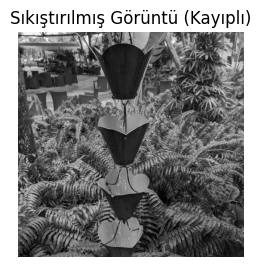

In [19]:
plt.subplot(1,2,2)
plt.title("Sıkıştırılmış Görüntü (Kayıplı)")
plt.imshow(reconstructed_img, cmap='gray')
plt.axis("off")

plt.show()

In [21]:
cv2.imwrite("sıkıştırılmış jpegli görüntü.jpg", reconstructed_img)

True

In [71]:
cv2.imwrite("orjinal1.jpg",img)

True

In [27]:
import os

orijinal = os.path.getsize("Downloads/rain-pots-jpeg-1.jpg")  # byte
sikistirilmis = os.path.getsize("sÄ±kÄ±ÅŸtÄ±rÄ±lmÄ±ÅŸ jpegli gÃ¶rÃ¼ntÃ¼.jpg")  # byte

oran = orijinal / sikistirilmis
yuzde = 100 * (1 - sikistirilmis / orijinal)

print(f"Sıkıştırma oranı: {oran:.2f}x")
print(f"Sıkıştırma yüzdesi: %{yuzde:.2f}")

Sıkıştırma oranı: 2.27x
Sıkıştırma yüzdesi: %55.89


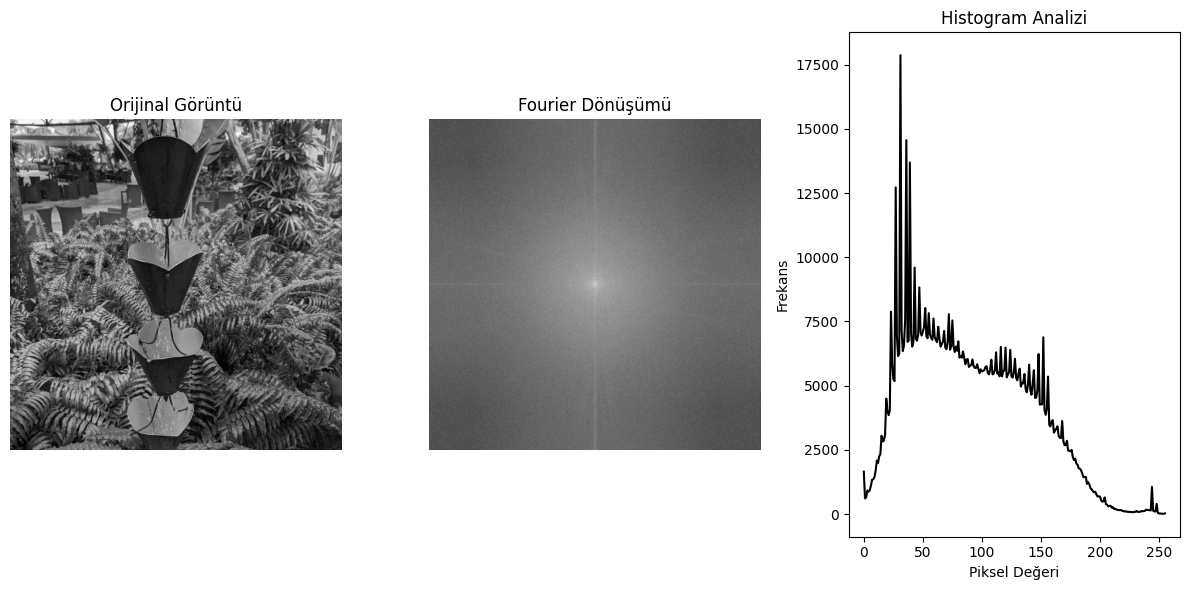

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "sıkıştırılmış jpegli görüntü.jpg"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Fourier Dönüşümü
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Log dönüşümü ile ölçekleme

# Histogram Analizi
histogram = cv2.calcHist([image], [0], None, [256], [0,256])

# Görüntü ve analizleri görselleştirme
plt.figure(figsize=(12, 6))

# Orijinal Görüntü
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Orijinal Görüntü")
plt.axis("off")

# Fourier Dönüşümü görüntüdeki yüksek ve düşük frekansları anliz ederiz
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Fourier Dönüşümü")
plt.axis("off")

# Histogram
plt.subplot(1, 3, 3)
plt.plot(histogram, color='black')
plt.title("Histogram Analizi")
plt.xlabel("Piksel Değeri")
plt.ylabel("Frekans")

plt.tight_layout()
plt.show()
